## Working with text in images using pytesseract library

###  Installing homebrew
**Just type in your teminal**

__`ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`__

[For more](https://treehouse.github.io/installation-guides/mac/homebrew)


**Note:-** if you find error message like:--  

Error: Failed to link all completions, docs and manpages:
  Permission denied @ rb_file_s_symlink - (../../../Homebrew/completions/zsh/_brew, /usr/local/share/zsh/site-functions/_brew)
Failed during: /usr/local/bin/brew update --force


then try


`sudo chown -R $USER:admin /usr/local/*`

and the run above command

__after that you install homebrew tesseract by typing in terminal__

`brew install tesseract`

https://stackoverflow.com/questions/50655738/tesseract-not-found-error

https://pypi.org/project/pytesseract/

### Installing libraries

In [1]:
!pip install pytesseract

In [2]:
!pip install pillow

### Import librabies

In [3]:
from PIL import Image, ImageFilter
import pytesseract 

import numpy as np
import matplotlib.pyplot as plt

from skimage import color
import cv2
import io

https://www.needpix.com/photo/download/1545668/motivation-quote-success-gradient-green-background-text-advice-environment

In [4]:
quote_img = Image.open('datasets/motivational-quote.jpg')

### Check format, mode and size of image

In [5]:
quote_img.format, quote_img.mode, quote_img.size

('JPEG', 'RGB', (1920, 1920))

In [6]:
type(quote_img)

PIL.JpegImagePlugin.JpegImageFile

### View original image

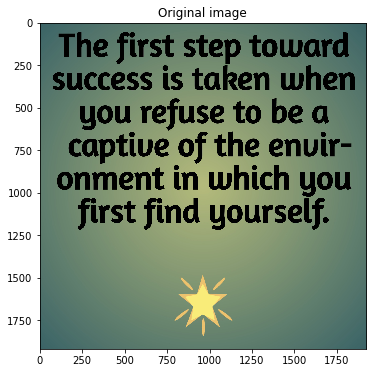

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Original image')
plt.imshow(quote_img)

plt.show()

### Image-text is converted into string

In [8]:
text = pytesseract.image_to_string(quote_img, lang='eng')

### Text is extracted from image

In [9]:
print(text)

The first step toward
success is taken when
you refuse to be a
captive of the enuir-
onment in which you
first find yourself.


A review about the play <i>Dan'l Druce, Blacksmith</i> from the paper Illustrated London News, November 18, 1876 <br />

Image source: https://commons.wikimedia.org/wiki/File:Dan%27l_Druce,_Blacksmith_-_Illustrated_London_News,_November_18,_1876_-_text.png

In [10]:
play_img = Image.open('datasets/dandruce.png')

play_img.format, play_img.mode, play_img.size

('PNG', 'RGB', (724, 600))

### View original image of example-02
Some lines are a little blurred towards the left and halfway down the image

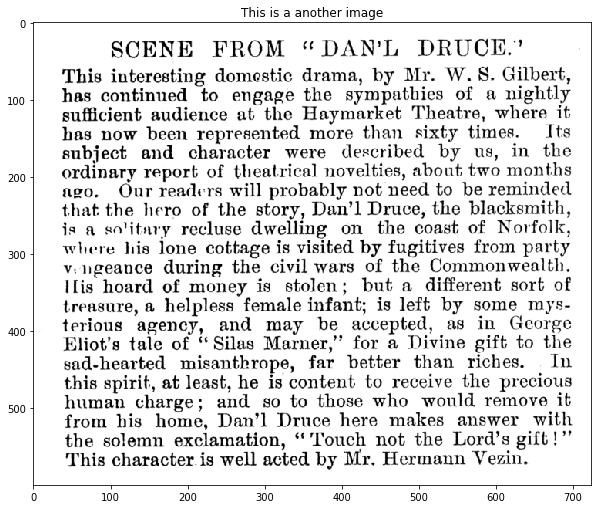

In [11]:
plt.figure(figsize=(10, 12))
plt.title('This is a another image')
plt.imshow(play_img)

plt.show()

### text-image is converted into string form

In [12]:
text = pytesseract.image_to_string(play_img, lang='eng')

### Text is extract from image
Most of the text is picked up correctly. The blurred content, such as the words "solitary" and "vengeance" have not been recognized

In [13]:
print(text)

SCENE FROM “DAN’L DRUCE.”

This interesting domestic drama, by Mr. W. S. Gilbert,
has continued to engage the sympathies of a nightly
sufficient audience at the Haymarket Theatre, where it
has now been represented more than sixty times. Its
subject and character were described by us, in the
ordinary report of theatrical novelties, about two months
ago. Our readers will probably not need to be reminded
that the hero of the story, Dan’! Druce, the blacksmith,
is a solitary recluse dwelling on the coast of Norfolk,
where his lone cottage is visited by fugitives from party
v.ngeance during the civil wars of the Commonwealth.
Ifis hoard of money is stolen; but a different sort of
treasure, a helpless female infant; is left by some mys-
terious agency, and may be accepted, as in George
Eliot’s tale of ‘Silas Marner,” for a Divine gift to the
sad-hearted misanthrope, far better than riches. In
this spirit, at least, he is content to receive the precious
human charge; and so to those who would

## Applying blur

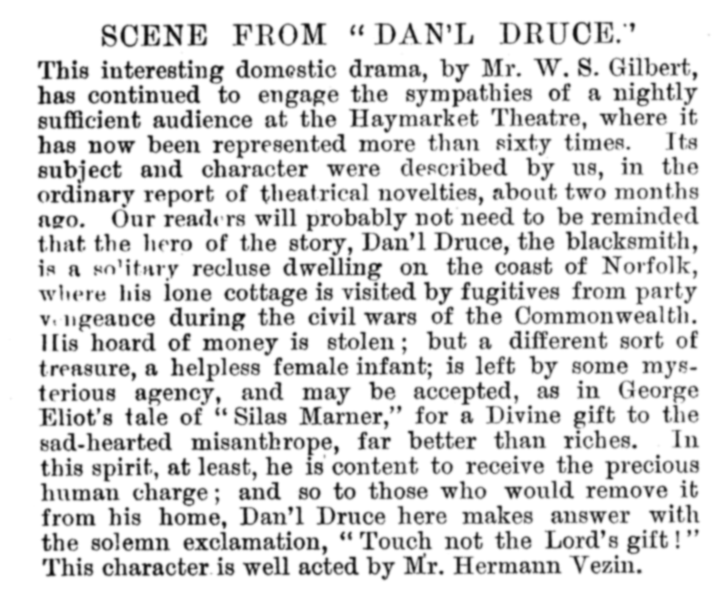

In [14]:
img_blur = play_img.filter(ImageFilter.GaussianBlur(1))
img_blur

### Convert text-image into a string from blur text-image and extract text from blurred image
The text is still mostly picked up. One difference is that the word "nightly" appears as "nightl"

In [15]:
text_blur = pytesseract.image_to_string(img_blur, lang='eng')

print(text_blur)

SCENE FROM “DAN'’L DRUCE.”

This interesting domestic drama, by Mr. W. 8. Gilbert,
has continued to engage the sympathies of a nightly
sufficient audience at the Haymarket Theatre, where it
has now been represented more than sixty times. Its
subject and character were described by us, in the
ordinary report of theatrical novelties, about two months
ago. Our readers will probably not need to be reminded
that the hero of the story, Dan’l Druce, the blacksmith,
is a solitury recluse dwelling on the coast of Norfolk,
where his lone cottage is visited by fugitives from party
v. ngeance during the civil wars of the Commonwealth.
Ilis hoard of money is stolen; but a different sort of
treasure, a helpless female infant; is left by some mys-
terious agency, and may be accepted, as in George
Eliot’s tale of ‘Silas Marner,” for a Divine gift to the
sad-hearted misanthrope, far better than riches. In
this spirit, at least, he is content to receive the precious
human charge; and so to those who wou

### Apply a greater degree of blur

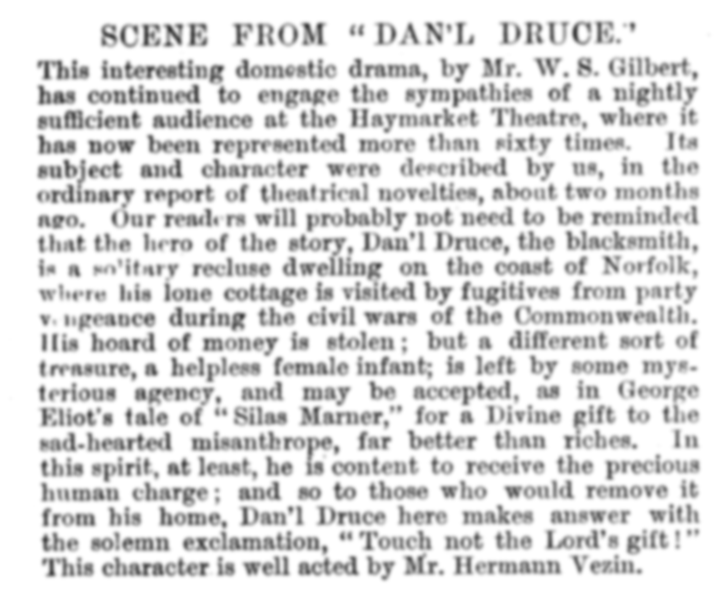

In [16]:
img_blur_more = play_img.filter(ImageFilter.GaussianBlur(1.75))
img_blur_more

#### This time pytesseract prints out some gibberish
The blur intensity proved too much for it. Only some of the text was picked up correctly

In [17]:
text_blur_more = pytesseract.image_to_string(img_blur_more, lang='eng')

print(text_blur_more)

¥2-"
Jalil
Oat. sf sizas
meat
emule ie
: sii clei j
see il Lu
: Hh dibel
eT THe iit: eat
ity i

32 ape
3 Heh Halil


## Text extration from a flipped or rotated image
We return to the first image with a motivational quote. Pytesseract doesn't do well with realigned text

### Flip top to bottom

In [18]:
img_flip = quote_img.transpose(Image.FLIP_TOP_BOTTOM)

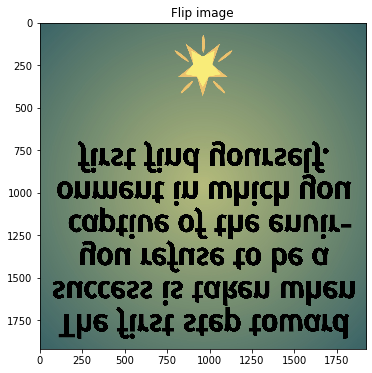

In [19]:
plt.figure(figsize=(12, 6))
plt.title('Flip image')
plt.imshow(img_flip)

plt.show()

### Text extraction from flipped image

Gibberish. The orientation needs to be perfect

In [20]:
text_flip = pytesseract.image_to_string(img_flip, lang='eng')
text_flip

'ineg lruq Nome):\nOUWG6US (U Mpc Non\ncabsine o) ¢u6 6UNIL-\n\nNon 16]M26 £0 ps a\nenccé2e2 f2 [OSE MpPGU\nLys lmeg egeb comang'